Primero que nada copiamos el csv en un dataframe.

In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
df = pd.read_csv("winemag-data_first150k.csv",encoding='utf8')

Visualizo todos los datos. Por el tamaño solo se pueden ver los primeros y últimos 5.

In [2]:
df

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


Pasamos a ver los tipos de datos de cada una de las columnas.

In [3]:
df.dtypes

Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

Comprobamos ahora la existencia de datos nulos

In [4]:
df.isnull().sum()

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [5]:
df_drop = df.dropna(thresh=int(df.shape[0] * .9), axis=1)
df_drop

,Unnamed: 0,country,description,points,price,province,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,91,20.0,Southern Italy,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",91,27.0,Champagne,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,91,20.0,Southern Italy,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",90,52.0,Champagne,Champagne Blend,Gosset


In [6]:
df_drop.isnull().sum()

Unnamed: 0         0
country            5
description        0
points             0
price          13695
province           5
variety            0
winery             0
dtype: int64

Me interesa tener los datos en base a los puntos que recibe cada vino. Quiero ver su descripción.

In [7]:
df['points'].describe()

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

In [8]:
df.corr()

,Unnamed: 0,points,price
Unnamed: 0,1.000000,-0.094197,-0.036687
points,-0.094197,1.000000,0.459863
price,-0.036687,0.459863,1.000000


In [9]:
df.cov()

,Unnamed: 0,points,price
Unnamed: 0,1.898335e+09,-13225.241176,-58456.549452
points,-1.322524e+04,10.383809,53.813033
price,-5.845655e+04,53.813033,1319.326636


Quiero mostrar solo los primeros 10 datos con la función pero me da el error:

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

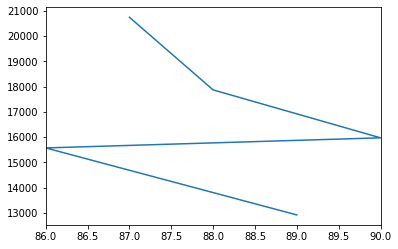

In [10]:
df['points'].value_counts().head().plot().bar()

Podemos observar la tendencia que sigue en torno a la calificación de los productos. Es interesante ver como los de 89 son muy bajos mientras la moda es de 87.
Para corroborar que la información es real, haremos un mode para ver la moda de estos.

In [11]:
df['points'].mode()

0    87
dtype: int64

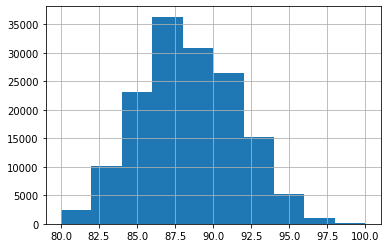

In [12]:
df['points'].hist()

Con esta gráfica podemos observar con mejor vista cada una de las calificaciones y la cantidad con la que se tienen. Vemos claramente cuales son el top 3 de las calificaciones que más se tiene de los vinos.

In [13]:
import seaborn as sns

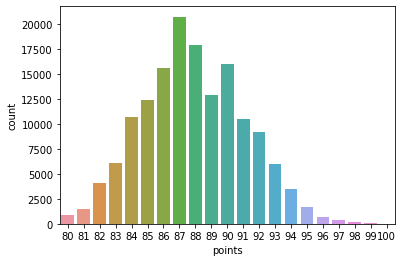

In [14]:
sns.countplot(df['points'])

Como podemos observar aquí es un mismo histograma como con matplotlib pero en este histograma viene desglosado cada una de las calificaciones para tener un valor más exacto de cuales son en realidad el top 3 de puntos que se suelen dar.

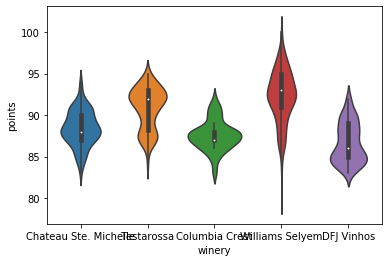

In [15]:
sns.violinplot(
    x='winery',
    y='points',
    data=df[df.winery.isin(df.winery.value_counts()[:5].index)]
)

Aquí podemos observar como Williams Selyem Tiene una mayor mediana con los puntos por encima de todas las otras vinerias pero de igual no son muchos los datos que se tienen como podría ser con Columbia que sí tiene una mayor cantidad de vinos pero de menor calidad, respecto a los puntos.